
# Project: TMDB Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

Questions:
Who is the most popular solo director?
Which solo director has make the most renenue?
Which solo director makes the highest rated film?
How do these all compare to one another?


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [939]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# importing data
# 



In [940]:
df.shape

(10866, 21)

In [941]:
df.info() 
#seeing which columnns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [942]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning 
Removing columns that I dont deem necessary, dropping null values and removing duplicate entries.

In [943]:
#dropping the columns that i think will be unnecessary to my analysis
df.drop(['imdb_id','homepage','tagline','keywords', 'production_companies'], axis = 1, inplace = True)

In [944]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   director        10822 non-null  object 
 7   overview        10862 non-null  object 
 8   runtime         10866 non-null  int64  
 9   genres          10843 non-null  object 
 10  release_date    10866 non-null  object 
 11  vote_count      10866 non-null  int64  
 12  vote_average    10866 non-null  float64
 13  release_year    10866 non-null  int64  
 14  budget_adj      10866 non-null  float64
 15  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [945]:

df.dropna(inplace = True)
#dropping null values as there isn't too many

In [946]:
df.info()
#final check to.make sure that theres no null values within the data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10730 non-null  int64  
 1   popularity      10730 non-null  float64
 2   budget          10730 non-null  int64  
 3   revenue         10730 non-null  int64  
 4   original_title  10730 non-null  object 
 5   cast            10730 non-null  object 
 6   director        10730 non-null  object 
 7   overview        10730 non-null  object 
 8   runtime         10730 non-null  int64  
 9   genres          10730 non-null  object 
 10  release_date    10730 non-null  object 
 11  vote_count      10730 non-null  int64  
 12  vote_average    10730 non-null  float64
 13  release_year    10730 non-null  int64  
 14  budget_adj      10730 non-null  float64
 15  revenue_adj     10730 non-null  float64
dtypes: float64(4), int64(6), object(6)
memory usage: 1.4+ MB


In [947]:
df.head(20)

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


In [948]:
df.shape

(10730, 16)

In [949]:
df[df.duplicated()]
#Seeing which value is the duplicate

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,110,5.0,2010,30000000.0,967000.0


In [950]:
df.drop_duplicates(inplace = True)
#dropping the duplicate row above


In [951]:
df.shape

(10729, 16)

In [952]:
df.genres.tail(20)
#checking how the genres are seperated by

10846                                    Horror
10847                    Science Fiction|Horror
10848                 Adventure|Science Fiction
10849                       Action|Comedy|Crime
10850       Action|Drama|Thriller|Crime|Mystery
10851     Adventure|Drama|Action|Family|Foreign
10852                                   Western
10853                      Comedy|Drama|Romance
10854                      Thriller|Drama|Crime
10855             Comedy|Family|Mystery|Romance
10856                       Comedy|Drama|Family
10857                            Action|Western
10858                                Comedy|War
10859    Mystery|Science Fiction|Thriller|Drama
10860                                    Comedy
10861                               Documentary
10862                    Action|Adventure|Drama
10863                            Mystery|Comedy
10864                             Action|Comedy
10865                                    Horror
Name: genres, dtype: object

## Data Wangling Written Explaination:
Firstly I removed the columns that I didn't deem Necessary to my analysis, which were:'imdb_id','homepage','tagline','keywords', 'production_companies'. I used df.drop() and then listed the columns that I wanted to drop
I then foulnd that there were null values for within cast, director, overview, runtime. As there wasn't very many null values, and there columns were all contained non-numeric values I decided to use dropna() to drop the rows that contained these null values.
I then went to check if there was any duplicates, using df.duplicated(), and there was one duplicate 'Tekken' which I removed using drop_duplicates().


<a id='eda'></a>
## Exploratory Data Analysis






## What is the average film rating for a solo directed film, and which directors have the highest average rating for their filmography?




In [953]:
df.vote_count.describe()
#seeing how the number of votes were distributed, with me being particulary interested in the top 25% of votes

count    10729.000000
mean       219.851151
std        578.862518
min         10.000000
25%         17.000000
50%         39.000000
75%        148.000000
max       9767.000000
Name: vote_count, dtype: float64

In [954]:
df_solo_director_top25 = df[~df['director'].str.contains('\|')].query("vote_count > 148")
df_solo_director_all = df[~df['director'].str.contains('\|')]
df_solo_director_all.head()
#removing all the results within the dirctors column that contain a |

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [955]:
df_solo_score_all.describe()

,vote_average
count,4386.000000
mean,5.848516
std,0.909475
min,1.500000
25%,5.300000
50%,5.900000
75%,6.419545
max,9.200000


In [956]:
df_solo_score_top25.describe()

,vote_average
count,1046.000000
mean,6.297549
std,0.698128
min,3.800000
25%,5.861667
50%,6.300000
75%,6.750000
max,8.200000


In [957]:
df_solo_score_top25 = df_solo_director_top25.groupby(['director'], as_index = False)['vote_average'].mean()
df_solo_score_all = df_solo_director_all.groupby(['director'], as_index = False)['vote_average'].mean()

In [1006]:
def hist_plot_by(x, xlabel, ylabel,title):
     ax = plt.subplot(1,1,1)
     ax.hist(x)
     ax.set_title(title)
     ax.set_xlabel(xlabel)
     ax.set_ylabel(ylabel)
     plt.show()
    
#Creating a function to create histograms without having to type out everything multiple times.

Plotting two histograms for the average movie ratings for solo directed film, one for all movies and one for movies that received the top 25% of total votes to see how they are distributed.



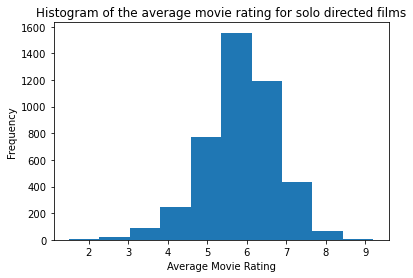

In [1024]:
hist_plot_by(df_solo_score_all.vote_average, 'Average Movie Rating', 'Frequency','Histogram of the average movie rating for solo directed films')

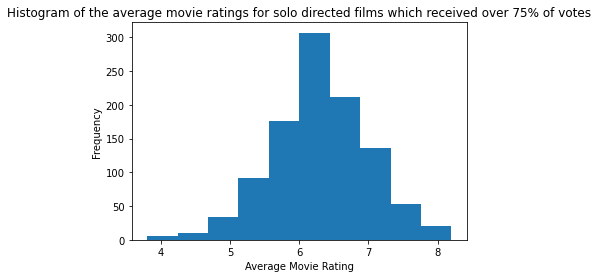

In [1023]:
hist_plot_by(df_solo_score_top25.vote_average, 'Average Movie Rating', 'Frequency','Histogram of the average movie ratings for solo directed films which received over 75% of votes')

Plotting 2 bar charts to show the top 20 solo directors with the highest average movie ratings, one including all movies and the other only including movies that received the top 25% of total votes


Text(0, 0.5, 'Average Movie Rating')

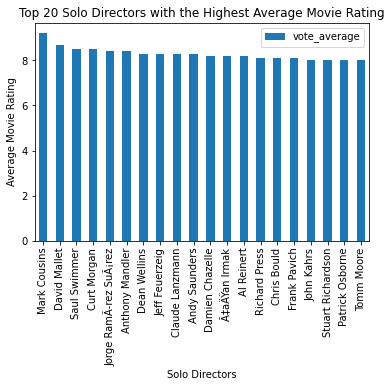

In [962]:
df_solo_director_20 = df_solo_score_all.sort_values(by="vote_average", ascending = False).head(20)
df_solo_director_20.reset_index().plot(x="director", y="vote_average",kind="bar")
plt.title("Top 20 Solo Directors with the Highest Average Movie Rating")
plt.xlabel("Solo Directors")
plt.ylabel("Average Movie Rating")
#plotting a bar chart for the average movie rating for the top 20 solo directors, where movies received in the top 25% of total votes

Text(0, 0.5, 'Average Movie Rating')

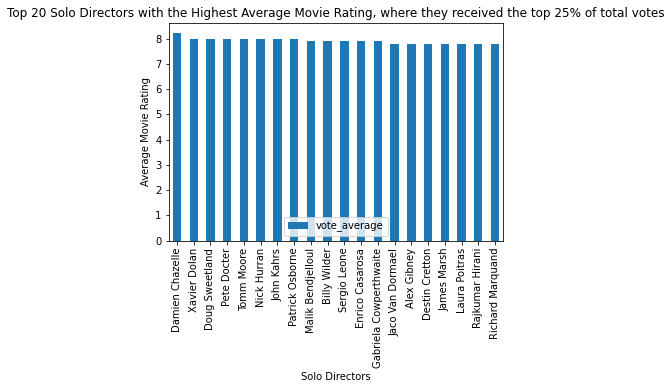

In [1038]:
df_solo_director_top25_20 = df_solo_score_top25.sort_values(by="vote_average", ascending = False).head(20)
df_solo_director_top25_20.reset_index().plot(x="director", y="vote_average",kind="bar")
plt.title("Top 20 Solo Directors with the Highest Average Movie Rating, where they received the top 25% of total votes")
plt.xlabel("Solo Directors")
plt.ylabel("Average Movie Rating")
#plotting a bar chart for the average movie rating for the top 20 solo directors, where the movies received in the top 25% of total votes

## Which solo director has the highest popularity score?


In [1039]:
df_solo_pop = df_solo_director_all.groupby(['director'], as_index = False)['popularity'].mean()
df_solo_pop.describe()

,popularity
count,4386.000000
mean,0.493761
std,0.622347
min,0.000973
25%,0.193568
50%,0.341677
75%,0.570419
max,16.696886


Creating a histogram and bar chart to see how the average popularity rating for solo directed movies are distributed, and to see the top 20 solo directors with the highest popularity rating.

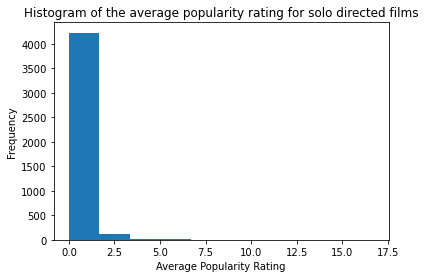

In [1022]:
hist_plot_by(df_solo_pop.popularity, 'Average Popularity Rating', 'Frequency','Histogram of the average popularity rating for solo directed films')
#Plotting a histogram for average popularity for solo directors

Text(0, 0.5, 'Average Movie Popularity Rating')

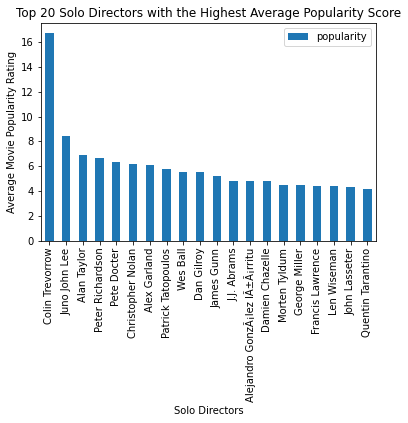

In [966]:
df_solo_pop_20 = df_solo_pop.sort_values(by = 'popularity', ascending = False).head(20)
df_solo_pop_20.reset_index().plot(x="director", y="popularity", kind="bar")
plt.title("Top 20 Solo Directors with the Highest Average Popularity Score")
plt.xlabel("Solo Directors")
plt.ylabel("Average Movie Popularity Rating")
#bar chart to show to top 20 directors with highest average popularity score.

## Which solo director has the highest adjusted revenue?

In [1040]:
df_solo_adj_rev = df_solo_director_all.groupby(['director'], as_index = False)['revenue_adj'].mean()
df_solo_adj_rev.describe()

,revenue_adj
count,4.386000e+03
mean,2.431250e+07
std,7.086338e+07
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,1.365994e+07
max,1.063172e+09


Creating a histogram and bar chart to see how the average adusted revenue per movie for solo directed movies are distributed, and to see the top 20 solo directors with the highest adjusted revenue.

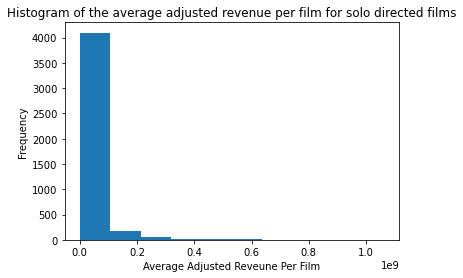

In [1021]:
hist_plot_by(df_solo_adj_rev.revenue_adj, 'Average Adjusted Reveune Per Film', 'Frequency','Histogram of the average adjusted revenue per film for solo directed films')
#Histogram for the average adjusted revenue for solo directors

In [1025]:
df_solo_adj_rev_20 = df_solo_adj_rev.sort_values(by = 'revenue_adj', ascending = False).head(20)


Text(0, 0.5, 'Average Adjusted Revenue Per Movie ')

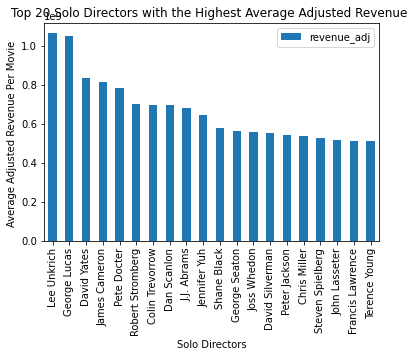

In [970]:
df_solo_adj_rev_20.reset_index().plot(x="director", y="revenue_adj", kind="bar")
plt.title("Top 20 Solo Directors with the Highest Average Adjusted Revenue ")
plt.xlabel("Solo Directors")
plt.ylabel("Average Adjusted Revenue Per Movie ")
#bar chart to show to top 20 directors with highest average adjusted revenue score.

Created scattergraphs to compared average movie rating, popularity rating and adjusted revenue to see if any have correlate with one another. 
I then also created scatterplots but with the top and bottom 2.5% of results removed to exclude the extreme results, and to make the scatterplots easier to read.
Then adding a line of best fit to see if there is any relation between these variables.



<AxesSubplot:title={'center':'hello'}, xlabel='popularity', ylabel='revenue_adj'>

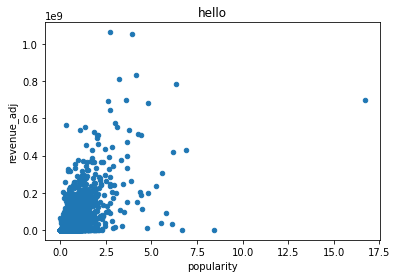

In [1026]:
df_rev_pop = df_solo_adj_rev.merge(df_solo_pop, left_on = 'director', right_on='director', how = 'inner')
df_rev_pop.plot(x = 'popularity', y = 'revenue_adj', kind = 'scatter', title = 'Scattergraph comparing average revenue and popularity rating for solo directed films')

#plotting a scattergraph between adjusted revenue and popularity to see if there's any correlation

<AxesSubplot:title={'center':'Scattergraph comparing average revenue and movie rating for solo directed films'}, xlabel='vote_average', ylabel='revenue_adj'>

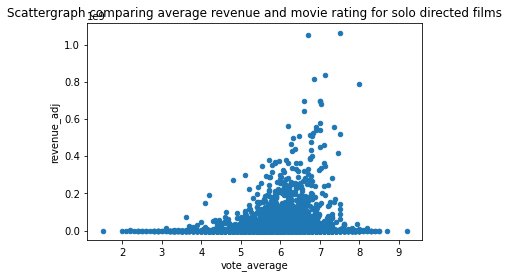

In [1029]:
df_rev_score = df_solo_adj_rev.merge(df_solo_score_all, left_on = 'director', right_on='director', how = 'inner')
df_rev_score.plot(x = 'vote_average', y = 'revenue_adj', kind = 'scatter', title = 'Scattergraph comparing average revenue and movie rating for solo directed films')

#plotting a scattergraph between adjusted revenue and average vote score to see if there's any correlation

<AxesSubplot:title={'center':'Scattergraph comparing average popularity rating and movie rating for solo directed films'}, xlabel='vote_average', ylabel='popularity'>

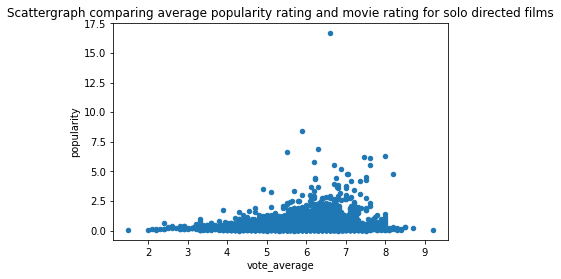

In [1030]:
df_pop_score = df_solo_pop.merge(df_solo_score_all, left_on = 'director', right_on='director', how = 'inner')
df_pop_score.plot(x = 'vote_average', y = 'popularity', kind = 'scatter', title = 'Scattergraph comparing average popularity rating and movie rating for solo directed films')

#plotting a scattergraph between average vote score and popularity to see if there's any correlation

In [974]:

q_low_pop = df_solo_pop['popularity'].quantile(0.025)
q_hi_pop = df_solo_pop["popularity"].quantile(0.975)

df_pop_filtered = df_solo_pop[(df_solo_pop["popularity"] < q_hi_pop) & (df_solo_pop["popularity"] > q_low_pop)]


q_low_score = df_solo_score_all['vote_average'].quantile(0.025)
q_hi_score = df_solo_score_all["vote_average"].quantile(0.975)

df_score_filtered = df_solo_score[(df_solo_score["vote_average"] < q_hi_score) & (df_solo_score["vote_average"] > q_low_score)]


q_low_rev = df_solo_adj_rev['revenue_adj'].quantile(0.025)
q_hi_rev = df_solo_adj_rev["revenue_adj"].quantile(0.975)

df_rev_filtered = df_solo_adj_rev[(df_solo_adj_rev["revenue_adj"] < q_hi_rev) & (df_solo_adj_rev["revenue_adj"] > q_low_rev)]


#Filtering out the top and bottom 2.5% of results to remove some outliers and make the graphs easier to read. 




<AxesSubplot:title={'center':'Scattergraph comparing average movie rating and popularity rating for solo directed films'}, xlabel='vote_average', ylabel='popularity'>

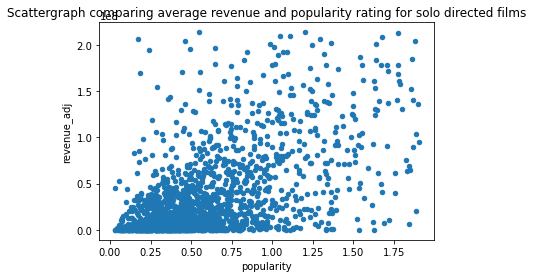

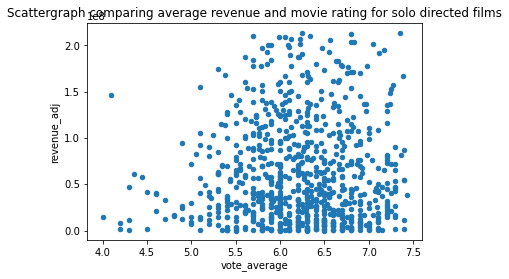

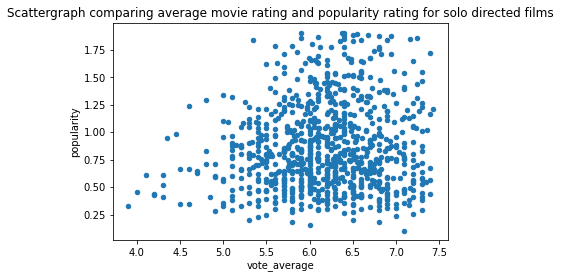

In [1028]:
df_rev_pop = df_rev_filtered.merge(df_pop_filtered, left_on = 'director', right_on='director', how = 'inner')
df_rev_pop.plot(x = 'popularity', y = 'revenue_adj', kind = 'scatter', title = 'Scattergraph comparing average revenue and popularity rating for solo directed films')

df_rev_score = df_rev_filtered.merge(df_score_filtered, left_on = 'director', right_on='director', how = 'inner')
df_rev_score.plot(x = 'vote_average', y = 'revenue_adj', kind = 'scatter', title = 'Scattergraph comparing average revenue and movie rating for solo directed films')

df_pop_score = df_pop_filtered.merge(df_score_filtered, left_on = 'director', right_on='director', how = 'inner')
df_pop_score.plot(x = 'vote_average', y = 'popularity', kind = 'scatter', title = 'Scattergraph comparing average movie rating and popularity rating for solo directed films')

#Plotting a new scattergraph with the new filtered data

Text(0.5, 1.0, 'Scatterplot comparing adjusted revenue against popularity rating including a regression line')

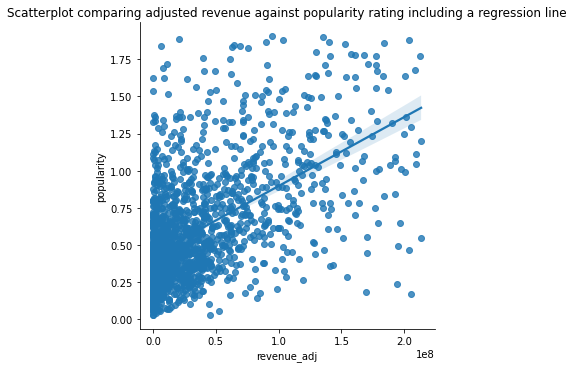

In [1035]:
sns.lmplot(x='revenue_adj',y='popularity',data=df_rev_pop,fit_reg=True)
ax = plt.gca()
ax.set_title("Scatterplot comparing adjusted revenue against popularity rating including a regression line")
#using seaborn to plot a regression line 

Text(0.5, 1.0, 'Scatterplot comparing vote average against popularity including a regression line')

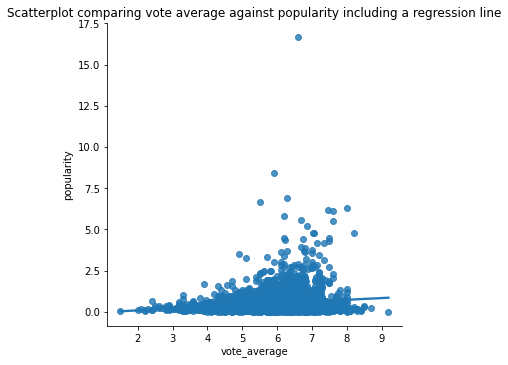

In [1036]:
sns.lmplot(x='vote_average',y='popularity',data=df_pop_score,fit_reg=True)
ax = plt.gca()
ax.set_title("Scatterplot comparing vote average against popularity including a regression line")

#using seaborn to plot a regression line 

Text(0.5, 1.0, 'Scatterplot comparing adjusted revenue against vote average including a regression line')

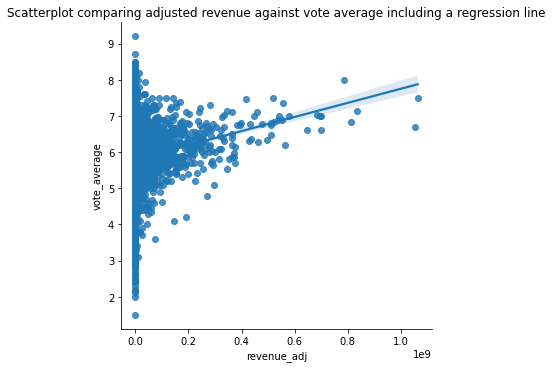

In [1037]:
sns.lmplot(x='revenue_adj',y='vote_average',data=df_rev_score,fit_reg=True)
ax = plt.gca()
ax.set_title("Scatterplot comparing adjusted revenue against vote average including a regression line")

#using seaborn to plot a regression line 

## What Genre is the most popular? (bonus question for fun)

In [979]:
genres_split = ['genre1', 'genre2', 'genre3', 'genre4', 'genre5']
df[genres_split] = df.genres.str.split('|', expand = True)
#Splitting up the genres to display only one genre per column
df.head()

,id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,...,vote_count,vote_average,release_year,budget_adj,revenue_adj,genre1,genre2,genre3,genre4,genre5
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,...,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,...,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,...,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,...,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,...,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [980]:
genres_start = df['genre1'].value_counts()

for c in genres_split:
    genres_start = genres_start.add(df[c].value_counts(), fill_value = 0) 

genres_total = genres_start - df['genre1'].value_counts()
genres_total.sort_values(ascending = True, inplace = True)
genres_total
#adding the total number of genres by interting through the genre1 column to the genre5 column.

TV Movie            162.0
Western             164.0
Foreign             184.0
War                 268.0
History             330.0
Music               398.0
Documentary         470.0
Animation           664.0
Mystery             808.0
Fantasy             908.0
Family             1214.0
Science Fiction    1221.0
Crime              1353.0
Adventure          1465.0
Horror             1636.0
Romance            1707.0
Action             2376.0
Thriller           2902.0
Comedy             3774.0
Drama              4746.0
dtype: float64

<AxesSubplot:>

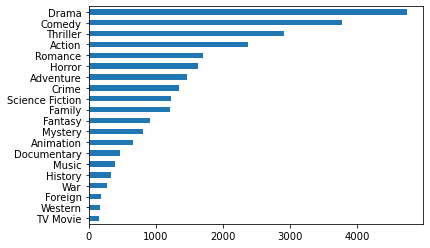

In [981]:
genres_total.plot(kind = 'barh', x = 'genre')
#Plotting a horizontal bar chart

## Conclusions:
In the report, I was analysing different factors against solo directed films and seeing if there was any relation between them.

To start, we can see the average movie rating for a solo directed film was 5.85, which can also been seen via the histogram which shows the majority of vote scores were between 5.5 and 6. There is a slight left skew for this graph.
However, there was a huge range in the number of votes these movies received for their scores. 
When comparing against the movies that received the top 25% of total movie score votes, it is show that the mean movie rating is now 6.3 and the histogram appears normally distributed. This shows that the more votes a movie receieves, the higher the movie score is.
The director with the highest average movie rating was Mark Cousins
The director with the highest average movie rating, where the movies received within the top 25% of total votes was Damien Chazelle

Then, comparing solo directed films against the popularity rating where the average popularity rating was 0.49, and a high majority of solo directed films popularity ratings were between 0-1.25. The director with the highest popularity rating was Colin Trevorrow, with a score almost double the second highest popularity score which was John Juno Lee.

For solo directed films against adjusted revenue, the mean adjusted revenue was $24,300,000.
The solo director with the highest average adjusted revenue was Lee Unkrich.

When comparing against average movie rating and adjusted revenue for solo directed films, there appears to be no relation between the two the line of regression almost flat.
When comparing against average movie rating and popularity, there appear to be a very light positive correlation. As the movie rating increases for a solo directed film, so should the popularity score, but it appears only very slightly.
However, when comparing adjusted revenue against popularity for solo directed movies, there appears to be stronger positive correlation between the two. So as the adjusted revenue increases, so should the popularity rating.

The limitations to my finding are that a popularity score explanation is a little bit vague, even when explained on the TMBD website, so it's a little hard to see what exactly you're comparing against.
There was also some missing director values which had to be removed.
